     Segment ke-  A0_(Vavg)  A0_(Vrms)  A1_(Vavg)  A1_(Vrms)  A2_(Vavg)  \
0              1     0.0027     0.0055     2.5457     2.5467     2.5357   
1              2     0.0032     0.0065     2.5557     2.5558     2.5391   
2              3     0.0027     0.0050     2.5503     2.5505     2.5279   
3              4     0.0024     0.0051     2.5523     2.5523     2.5369   
4              5     0.0027     0.0055     2.5560     2.5560     2.5491   
..           ...        ...        ...        ...        ...        ...   
195          196     0.0027     0.0055     2.5912     2.5912     2.5809   
196          197     0.0020     0.0044     2.5941     2.5942     2.5787   
197          198     0.1087     0.1966     2.6090     2.6177     2.5948   
198          199     0.0401     0.0624     2.5780     2.5808     2.5613   
199          200     0.0032     0.0055     2.5929     2.5936     2.5792   

     A2_(Vrms)  Klasifikasi  
0       2.5366            0  
1       2.5397            0  
2       2

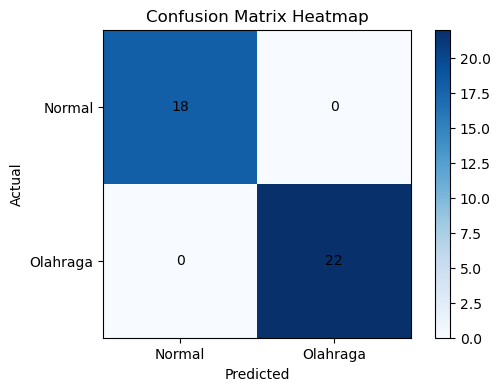


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        18
    Olahraga       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# --- Baca dataset ---
df = pd.read_csv(r'E:\ELKA\ELTER25\Project PCG SMT3\GUI\dataset\pcg_rms_2025-10-13_15-41-44(gabungan).csv')
df

# --- Encode label klasifikasi ---
le = LabelEncoder()
df['Klasifikasi'] = le.fit_transform(df['Klasifikasi'])
print(df)

# --- Pisahkan fitur dan label ---
X = df.drop(['Klasifikasi'], axis='columns')
y = df['Klasifikasi']
print(X)

# --- Bagi dataset menjadi train dan test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# --- Buat dan latih model decision tree ---
model = tree.DecisionTreeClassifier(max_depth=50)
model.fit(X_train, y_train)

# --- Evaluasi akurasi ---
print("Akurasi:", model.score(X_test, y_test))

# --- Prediksi ---
y_pred = model.predict(X_test)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix (Array):")
print(cm)

# --- Tampilkan sebagai tabel dengan label kelas ---
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
print("\nConfusion Matrix (Tabel):")
print(cm_df)

# --- Visualisasi heatmap (tanpa seaborn) ---
plt.figure(figsize=(6,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(le.classes_)), le.classes_)
plt.yticks(np.arange(len(le.classes_)), le.classes_)

# Tambahkan angka di tiap sel
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.show()

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
